In [2]:
# All libraries needed
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Read csv files with pandas library

In [3]:
first_half = pd.read_csv('./Raw_data_DEMO_GAME/OPTICAL_TRACKING/TXT/bepro_tracking_data_FIRST_HALF.csv', sep=';')
first_half

,Frame,Player1,Player2,Player3,Player4,Player5,Player6,Player7,Player8,Player9,...,Player15,Player16,Player17,Player18,Player19,Player20,Player21,Player22,Ball,Status
0,251,"9852,3365","6945,1418","7183,3132","7129,4197","6790,5851","6157,335","6063,42","5290,2483","5272,1855",...,"4387,2975","5173,4494","4458,395","3635,1193","3457,2955","3401,3953","3655,5174","1072,3381","5250,34",BALL_OUT
1,252,"9853,3364","6944,1421","7183,3132","7131,4195","6789,5852","6157,335","6063,4198","5291,2482","5272,1858",...,"4388,2978","5173,4492","4456,3947","3635,1193","3457,2956","3400,3952","3655,5174","1071,3381","5250,3404",BALL_OUT
2,253,"9853,3363","6943,1424","7183,3131","7133,4193","6787,5853","6158,335","6063,4195","5291,2482","5272,186",...,"4388,298","5173,449","4454,3945","3635,1194","3456,2956","3399,3952","3655,5174","1070,3381","5251,3407",BALL_OUT
3,254,"9853,3362","6942,1426","7182,313","7133,4192","6786,5854","6158,335","6063,4193","5291,2482","5271,1863",...,"4389,2983","5173,4489","4453,3943","3635,1195","3454,2956","3397,3952","3655,5174","1070,3381","5251,341",BALL_OUT
4,255,"9854,336","6942,1429","7182,3129","7134,419","6785,5855","6158,335","6063,4192","5290,2482","5270,1865",...,"4389,2985","5173,4488","4451,3941","3635,1195","3453,2956","3396,3952","3655,5174","1069,3381","5251,3413",BALL_OUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71920,72171,"7713,3737","4211,2715","5148,4097","4129,4983","4691,6038","2997,4951","2774,5783","1859,5122","1794,3268",...,"1637,5315","3243,4511","1558,448","1693,3034","1374,3914","3084,5277","1642,6805","607,3962","3460,5067",AWAY
71921,72172,"7711,3738","4211,2717","5146,4098","4126,4985","4690,6039","2994,4951","2774,5783","1859,5124","1792,327",...,"1635,5317","3244,4511","1558,448","1693,3036","1371,3915","3087,5275","1640,6807","610,3963","3460,5067",AWAY
71922,72173,"7710,374","4211,2719","5144,41","4124,4987","4689,604","2991,495","2774,5783","1859,5127","1791,3273",...,"1633,5318","3245,4511","1558,448","1694,3037","1368,3916","3091,5274","1637,6808","612,3965","3460,5067",AWAY
71923,72174,"7709,3741","4212,2721","5142,4101","4121,4989","4688,6041","2988,495","2774,5783","1859,5129","1791,3276",...,"1630,5319","3246,4512","1558,4481","1695,304","1365,3917","3095,5273","1635,6809","614,3966","3460,5067",AWAY


Split cells to have X and Y coordonates in a different dict

In [4]:
X = {}
Y = {}

for t in range(len(first_half)):
    for i in first_half.columns[1:-1]:
        X[t,i] = first_half[i][t].split(',')[0]
        X[t,i] = int(X[t,i])
    
        Y[t,i] = first_half[i][t].split(',')[-1]
        Y[t,i] = int(Y[t,i])
    

Select team home and team visitor with the number of player -> will be changed and will use XML file to have the info

In [5]:
team_H = first_half.columns[1:12]
team_V = first_half.columns[13:-2]

Plot player localisation on a field background with different colors for player of the team home, visitor and the ball. Test for the firt frame

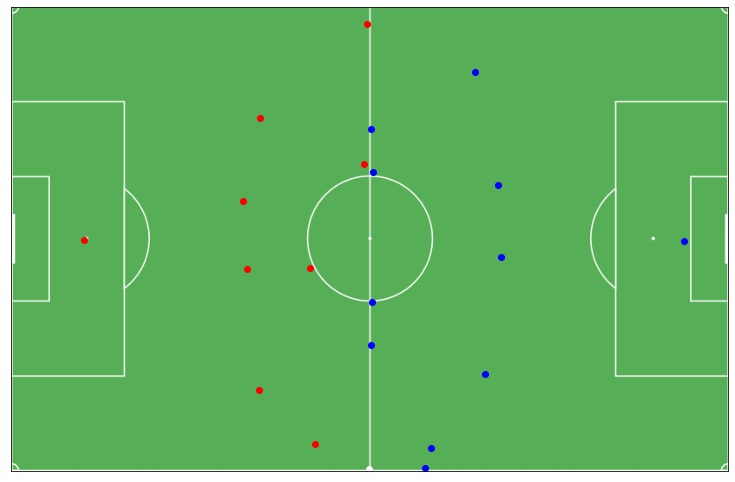

In [6]:
plt.rcParams["figure.figsize"] = [10.5, 6.8]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("./image/field.png")
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 10500, 0, 6800])
for i in first_half.columns[1:-1]:    
    if i in team_H:
        plt.scatter(X[0,i],Y[0,i],c='b')
    if i in team_V:
        plt.scatter(X[0,i],Y[0,i],c='r')
    if i == 'Ball':
        plt.scatter(X[0,i],Y[0,i],c='w')
    #plt.xlim(0,10500)
    #plt.ylim(0,6800)
    plt.xticks([])
    plt.yticks([])
plt.show()

Loop to have a loop on all the frame -> will be changed to use animation directly in python

In [7]:
# for t in range(len(first_half)):
#     plt.figure(figsize=(10.5,6.8))
#     for i in first_half.columns[1:-1]:    
#         if i in team_H:
#             plt.scatter(X[t,i],Y[t,i],c='b')
#         if i in team_V:
#             plt.scatter(X[t,i],Y[t,i],c='r')
#         if i == 'Ball':
#             plt.scatter(X[t,i],Y[t,i],c='k')
#     plt.xlim(0,10500)
#     plt.ylim(0,6800)
#     plt.xticks([])
#     plt.yticks([])
#     #plt.savefig('./fig/%i.png'%t)

Read the XML file to have the number of player

In [8]:
import xml.etree.ElementTree as ET

# Passing the path of the xml document to enable the parsing process
tree = ET.parse('./Raw_data_DEMO_GAME/OPTICAL_TRACKING/XML/bepro_tracking_data_FIRST_HALF.xml')

# getting the parent tag of the xml document
root = tree.getroot()

2 class in the root -> choose the Metadata -> the first with [0]

Look inside the root what are the categories

In [9]:
for child in root[0]:
    print(child.tag)

GlobalConfig
Sessions
Teams
Players
Devices
PlayerChannels


Read the teams' ID

In [10]:
for i in range(len(root[0])):
    if root[0][i].tag == 'Teams':
        ID_home = root[0][i][0].attrib
        ID_vis = root[0][i][1].attrib

Put players' shirt number, name and position in an dataframe

In [11]:
players_home = pd.DataFrame(columns=['num','name','pos'],index=np.arange(0,16))
players_vis = pd.DataFrame(columns=['num','name','pos'],index=np.arange(16,32))

for i in range(len(root[0])):
    if root[0][i].tag == 'Players':
        for j in range(len(root[0][i])):
            if root[0][i][j].attrib['teamId'] == ID_home['id']:
                for k in range(len(root[0][i][j])):
                    if root[0][i][j][k].tag == 'ShirtNumber':
                        players_home.num[j] = root[0][i][j][k].text
                    if root[0][i][j][k].tag == 'Name':
                        players_home.name[j] = root[0][i][j][k].text
                    if root[0][i][j][k].tag == 'ProviderPlayerParameters':
                        players_home.pos[j] = root[0][i][j][k][0][1].text
            if root[0][i][j].attrib['teamId'] == ID_vis['id']:
                for k in range(len(root[0][i][j])):
                    if root[0][i][j][k].tag == 'ShirtNumber':
                        players_vis.num[j] = root[0][i][j][k].text
                    if root[0][i][j][k].tag == 'Name':
                        players_vis.name[j] = root[0][i][j][k].text
                    if root[0][i][j][k].tag == 'ProviderPlayerParameters':
                        players_vis.pos[j] = root[0][i][j][k][0][1].text

players_home = players_home.reset_index()
players_vis = players_vis.reset_index()

Plot field with shirt numbers -> update figsize with field size written in XML file

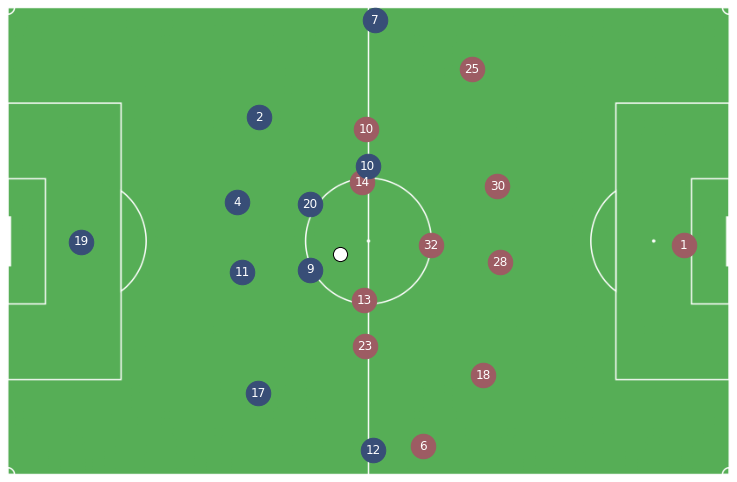

In [12]:
plt.rcParams["figure.figsize"] = [10.5, 6.8]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("./image/field.png")
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 10500, 0, 6800])
for i in range(len(team_H)):
    plt.scatter(X[20,team_H[i]],Y[20,team_H[i]],c='#9d5c63',s=600)    
    plt.text(X[20,team_H[i]],Y[20,team_H[i]],"%s" %players_home.num[i],fontsize=12,ha="center",va='center',c='w')
for i in range(len(team_V)): 
    plt.scatter(X[20,team_V[i]],Y[20,team_V[i]],c='#384e77',s=600)    
    plt.text(X[20,team_V[i]],Y[20,team_V[i]],"%s" %players_vis.num[i],fontsize=12,ha="center",va='center',c='w')
plt.scatter(X[20,'Ball'],Y[20,'Ball'],c='w',edgecolors='k',s=200)
#plt.xlim(0,10500)
#plt.ylim(0,6800)
ax.axis('off')
plt.show()

Read the event data csv file

In [13]:
events = pd.read_csv('./Raw_data_DEMO_GAME/EVENT_DATA/FC-Cerberus_FC-Hercules_event_data.csv', sep=',')

Select only the first half

In [14]:
event_FH = events[events.event_period=='FIRST_HALF']

Calculate fps

In [15]:
# Time in secondes at the end of the first half
time_end_FH = event_FH.event_time[len(event_FH)-1]/1000

In [16]:
# frame per second for the first half
fps = len(first_half) / time_end_FH
# => ~ 25 fps

Matching timing between event and tracking data

Let's see if at a corner time, the tracking data is at this same corner time

In [17]:
corner  = event_FH[event_FH.filtered_event_types.str.contains('cornerKick', na=False)]

In [18]:
corner = corner.reset_index()

In [19]:
corner.event_time[0]

410314

In [20]:
410314/1000*25

10257.85

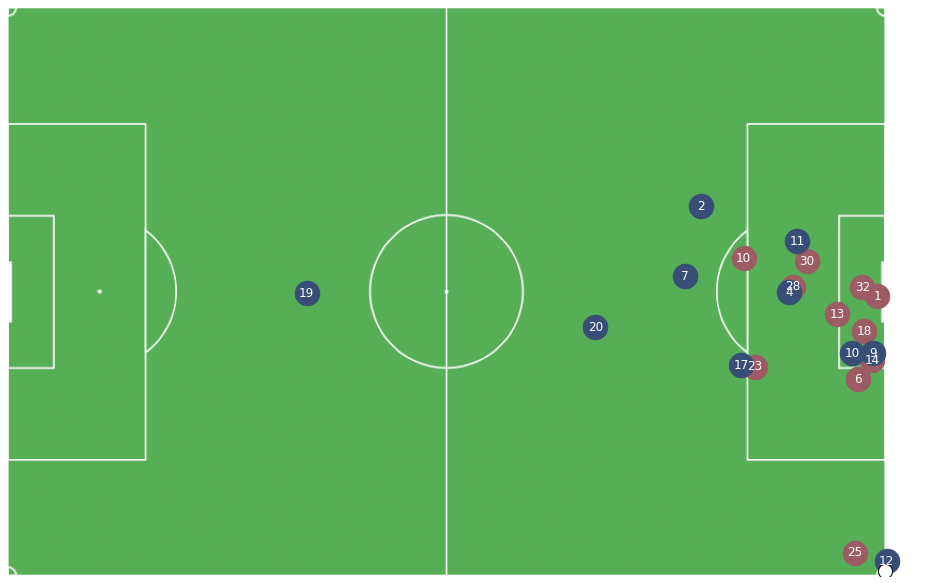

In [21]:
plt.rcParams["figure.figsize"] = [10.5*1.25, 6.8*1.25]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("./image/field.png")
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 10500, 0, 6800])
for i in range(len(team_H)):
    plt.scatter(X[10258,team_H[i]],Y[10258,team_H[i]],c='#9d5c63',s=600)    
    plt.text(X[10258,team_H[i]],Y[10258,team_H[i]],"%s" %players_home.num[i],fontsize=12,ha="center",va='center',c='w')
for i in range(len(team_V)): 
    plt.scatter(X[10258,team_V[i]],Y[10258,team_V[i]],c='#384e77',s=600)    
    plt.text(X[10258,team_V[i]],Y[10258,team_V[i]],"%s" %players_vis.num[i],fontsize=12,ha="center",va='center',c='w')
plt.scatter(X[10258,'Ball'],Y[10258,'Ball'],c='w',edgecolors='k',s=200)
#plt.xlim(0,10500)
#plt.ylim(0,6800)
ax.axis('off')
plt.show()

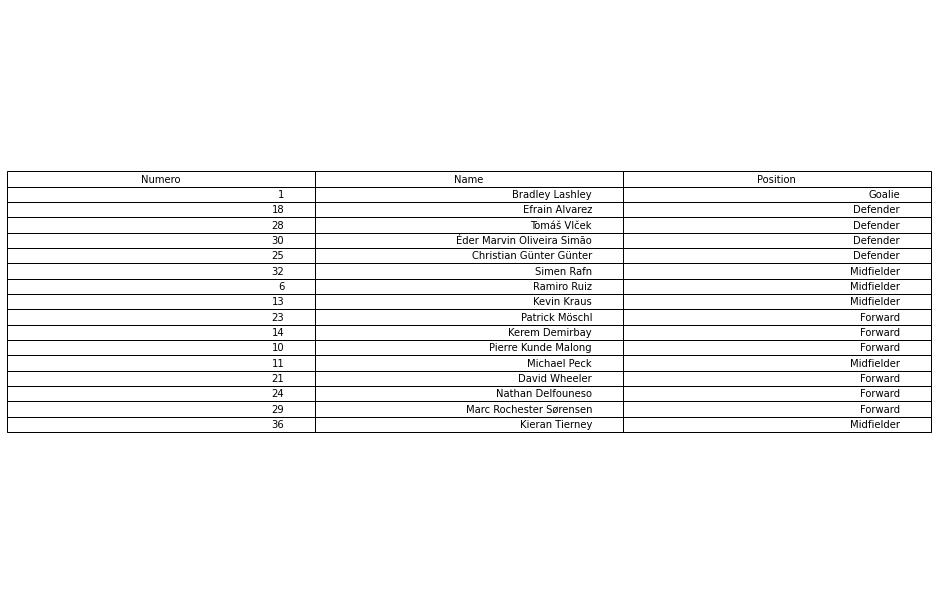

In [22]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=players_home[['num','name','pos']].values, colLabels=['Numero','Name','Position'], loc='center')

fig.tight_layout()

plt.show()

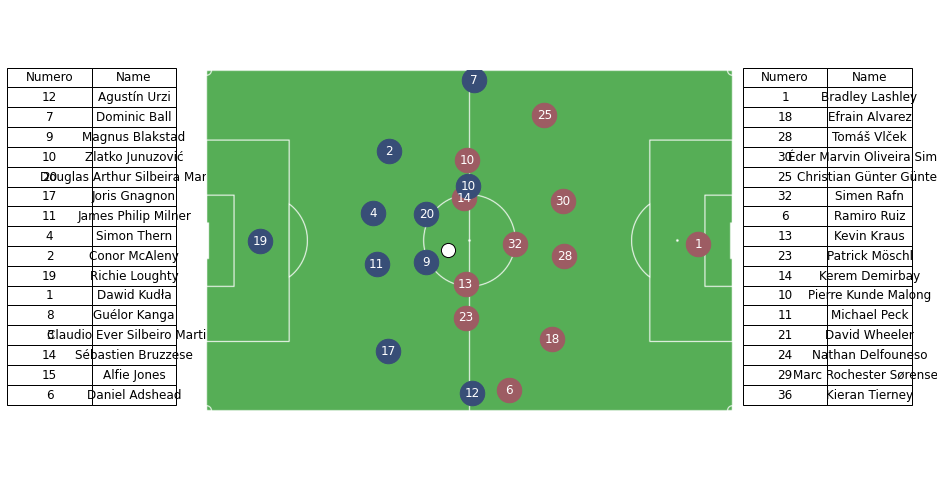

In [23]:
plt.rcParams["figure.figsize"] = [10.5*1.25, 6.8]
plt.rcParams["figure.autolayout"] = True

im = plt.imread("./image/field.png")

fig, (ax1,ax2,ax3) = plt.subplots(1,3, gridspec_kw={'width_ratios': [1.25,3.5,1.25]})

fig.patch.set_visible(False)

im = ax2.imshow(im, extent=[0, 10500, 0, 6800])
for i in range(len(team_H)):
    ax2.scatter(X[20,team_H[i]],Y[20,team_H[i]],c='#9d5c63',s=600)    
    ax2.text(X[20,team_H[i]],Y[20,team_H[i]],"%s" %players_home.num[i],fontsize=12,ha="center",va='center',c='w')
for i in range(len(team_V)): 
    ax2.scatter(X[20,team_V[i]],Y[20,team_V[i]],c='#384e77',s=600)    
    ax2.text(X[20,team_V[i]],Y[20,team_V[i]],"%s" %players_vis.num[i],fontsize=12,ha="center",va='center',c='w')
ax2.scatter(X[20,'Ball'],Y[20,'Ball'],c='w',edgecolors='k',s=200)
#plt.xlim(0,10500)
#plt.ylim(0,6800)
ax2.axis('off')

#table = ax1.table(cellText=players_home[['num','name']].values, fontsize=40, cellLoc='center', colLabels=['Numero','Name'], loc='right', bbox=([0, 0.15, 0.9, 0.72]))
table = ax3.table(cellText=players_home[['num','name']].values, cellLoc='center', colLabels=['Numero','Name'], loc='right', bbox=([0, 0.15, 0.9, 0.72]))
table.auto_set_font_size(False)
table.set_fontsize(12)

ax3.axis('off')
ax3.axis('tight')

#table = ax3.table(cellText=players_vis[['num','name']].values, fontsize=40, cellLoc='center', colLabels=['Numero','Name'], loc='left', bbox=([0, 0.15, 0.9, 0.72]))
table = ax1.table(cellText=players_vis[['num','name']].values, cellLoc='center', colLabels=['Numero','Name'], loc='left', bbox=([0, 0.15, 0.9, 0.72]))
table.auto_set_font_size(False)
table.set_fontsize(12)

ax1.axis('off')
ax1.axis('tight')



#fig.tight_layout()
plt.show()

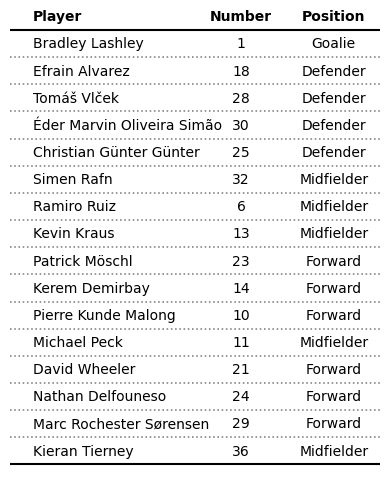

In [38]:
fig = plt.figure(figsize=(4,5), dpi=100)
ax = plt.subplot()

ncols = 3
nrows = players_home.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 2.5, 3.5, 4.5, 5.5]
columns = ['name', 'num', 'pos']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        text_label = f'{players_home[column].iloc[i]}'
        weight = 'normal'
        ax.annotate(
            xy=(positions[j], nrows - i),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# Add column names
column_names = ['Player', 'Number', 'Position']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .75),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows+0.5, nrows+0.5], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0.5, 0.5], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x+0.5, x+0.5], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.set_axis_off()


# plt.savefig(
#     'figures/pretty_example.png',
#     dpi=300,
#     transparent=True,
#     bbox_inches='tight'
# )

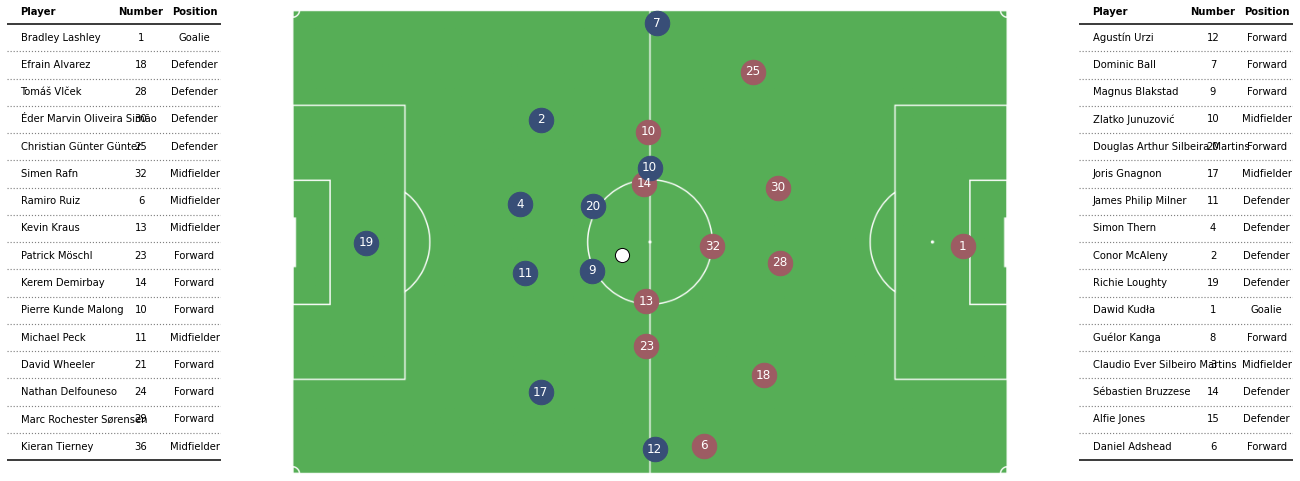

In [47]:
plt.rcParams["figure.figsize"] = [10.5*1.75, 6.8]
plt.rcParams["figure.autolayout"] = True

im = plt.imread("./image/field.png")

fig, (ax1,ax2,ax3) = plt.subplots(1,3, gridspec_kw={'width_ratios': [1.25,5,1.25]})

fig.patch.set_visible(False)

im = ax2.imshow(im, extent=[0, 10500, 0, 6800])
for i in range(len(team_H)):
    ax2.scatter(X[20,team_H[i]],Y[20,team_H[i]],c='#9d5c63',s=600)    
    ax2.text(X[20,team_H[i]],Y[20,team_H[i]],"%s" %players_home.num[i],fontsize=12,ha="center",va='center',c='w')
for i in range(len(team_V)): 
    ax2.scatter(X[20,team_V[i]],Y[20,team_V[i]],c='#384e77',s=600)    
    ax2.text(X[20,team_V[i]],Y[20,team_V[i]],"%s" %players_vis.num[i],fontsize=12,ha="center",va='center',c='w')
ax2.scatter(X[20,'Ball'],Y[20,'Ball'],c='w',edgecolors='k',s=200)
#plt.xlim(0,10500)
#plt.ylim(0,6800)
ax2.axis('off')



# left table for home players
ncols = 3
nrows = players_home.shape[0]

ax1.set_xlim(0, ncols + 1)
ax1.set_ylim(0, nrows + 1)

positions = [0.25, 2.5, 3.5, 4.5, 5.5]
columns = ['name', 'num', 'pos']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        text_label = f'{players_home[column].iloc[i]}'
        weight = 'normal'
        ax1.annotate(
            xy=(positions[j], nrows - i),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# Add column names
column_names = ['Player', 'Number', 'Position']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax1.annotate(
            xy=(positions[index], nrows + .75),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax1.plot([ax1.get_xlim()[0], ax1.get_xlim()[1]], [nrows+0.5, nrows+0.5], lw=1.5, color='black', marker='', zorder=4)
ax1.plot([ax1.get_xlim()[0], ax1.get_xlim()[1]], [0.5, 0.5], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax1.plot([ax1.get_xlim()[0], ax1.get_xlim()[1]], [x+0.5, x+0.5], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax1.set_axis_off()




# right table for visitor players
ncols = 3
nrows = players_vis.shape[0]

ax3.set_xlim(0, ncols + 1)
ax3.set_ylim(0, nrows + 1)

positions = [0.25, 2.5, 3.5, 4.5, 5.5]
columns = ['name', 'num', 'pos']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        text_label = f'{players_vis[column].iloc[i]}'
        weight = 'normal'
        ax3.annotate(
            xy=(positions[j], nrows - i),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# Add column names
column_names = ['Player', 'Number', 'Position']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax3.annotate(
            xy=(positions[index], nrows + .75),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax3.plot([ax3.get_xlim()[0], ax3.get_xlim()[1]], [nrows+0.5, nrows+0.5], lw=1.5, color='black', marker='', zorder=4)
ax3.plot([ax3.get_xlim()[0], ax3.get_xlim()[1]], [0.5, 0.5], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax3.plot([ax3.get_xlim()[0], ax3.get_xlim()[1]], [x+0.5, x+0.5], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax3.set_axis_off()




#fig.tight_layout()
plt.show()

Well done! 

To do : 
- Use only soccers' last names
- Change background color with shirt color